In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Colab Notebooks/ISIC/data/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/ISIC/data/test'

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(
    train_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_set = test_datagen.flow_from_directory(
    test_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
base_model = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
model1 = Model(inputs=base_model.input, outputs=x)

model1.compile(optimizer=Adam(), loss='binary_crossentropy',
               metrics=['accuracy', Precision(), Recall(), AUC()])

checkpoint = ModelCheckpoint(filepath='h4_second_m1.keras', verbose=2, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

In [ ]:
history1 = model1.fit(
    train_set,
    epochs=20,
    steps_per_epoch=5,
    validation_data=test_set,
    validation_steps=4,
    callbacks=[checkpoint, early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 5.64739, saving model to h4_second_m1.keras
5/5 - 288s - 58s/step - accuracy: 0.5500 - auc_1: 0.5387 - loss: 30.5594 - precision_1: 0.4600 - recall_1: 0.3382 - val_accuracy: 0.5781 - val_auc_1: 0.6494 - val_loss: 5.6474 - val_precision_1: 0.5278 - val_recall_1: 0.9500 - learning_rate: 0.0010
Epoch 2/20

Epoch 2: val_loss did not improve from 5.64739
5/5 - 236s - 47s/step - accuracy: 0.6750 - auc_1: 0.7010 - loss: 6.4274 - precision_1: 0.6126 - recall_1: 0.8831 - val_accuracy: 0.5469 - val_auc_1: 0.6095 - val_loss: 5.9308 - val_precision_1: 0.7778 - val_recall_1: 0.1111 - learning_rate: 0.0010
Epoch 3/20

Epoch 3: val_loss improved from 5.64739 to 1.60871, saving model to h4_second_m1.keras
5/5 - 244s - 49s/step - accuracy: 0.7500 - auc_1: 0.7940 - loss: 2.4812 - precision_1: 0.8200 - recall_1: 0.5694 - val_accuracy: 0.7812 - val_auc_1: 0.8656 - val_loss: 1.6087 - val_precision_1: 0.8571 - val_recall_1: 0.6667 - learning_rate: 0.0010
Ep

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 - 155s - 31s/step - accuracy: 0.7937 - auc_1: 0.8141 - loss: 1.8000 - precision_1: 0.8367 - recall_1: 0.6212 - val_accuracy: 0.8500 - val_auc_1: 0.8611 - val_loss: 0.4354 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 7/20

Epoch 7: val_loss did not improve from 0.43544
5/5 - 236s - 47s/step - accuracy: 0.8687 - auc_1: 0.8954 - loss: 0.8897 - precision_1: 0.8209 - recall_1: 0.8594 - val_accuracy: 0.7656 - val_auc_1: 0.8796 - val_loss: 0.9021 - val_precision_1: 0.8571 - val_recall_1: 0.6462 - learning_rate: 5.0000e-04
Epoch 8/20

Epoch 8: val_loss did not improve from 0.43544

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
5/5 - 233s - 47s/step - accuracy: 0.7750 - auc_1: 0.8206 - loss: 1.1696 - precision_1: 0.7174 - recall_1: 0.8684 - val_accuracy: 0.7891 - val_auc_1: 0.8773 - val_loss: 0.7753 - val_precision_1: 0.8163 - val_recall_1: 0.6897 - learning_rate: 5.0000e-04
Epoch 9/20

Epoch 9: val_loss did not imp

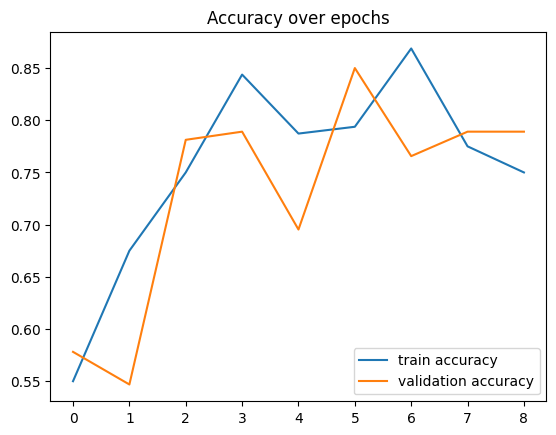

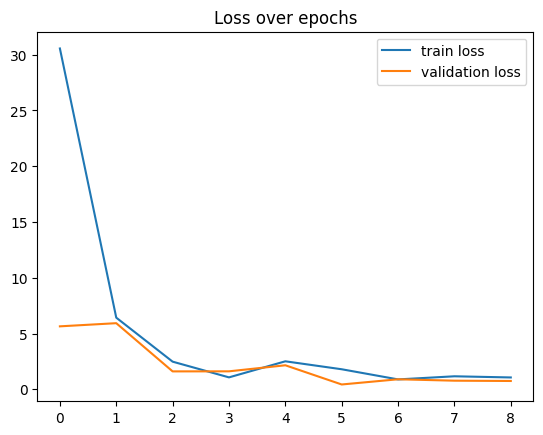

In [ ]:
plt.plot(history1.history['accuracy'], label='train accuracy')
plt.plot(history1.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

## Model 2

In [ ]:
base_model = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Freeze all layers except the last 2
for layer in base_model.layers[:-2]:
    layer.trainable = False
for layer in base_model.layers[-2:]:
    layer.trainable = True

In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=base_model.input, outputs=x)

model2.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=2)
checkpoint = ModelCheckpoint(filepath='h4_second_m2.keras', verbose=2, save_best_only=True)

In [ ]:
history2 = model2.fit(
    train_set,
    epochs=20,
    steps_per_epoch=5,
    validation_data=test_set,
    validation_steps=4,
    callbacks=[checkpoint, early_stopping],
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.01748, saving model to h4_second_m2.keras
5/5 - 264s - 53s/step - accuracy: 0.5250 - auc_2: 0.5187 - loss: 3.9870 - precision_2: 0.5750 - recall_2: 0.5227 - val_accuracy: 0.6641 - val_auc_2: 0.7663 - val_loss: 1.0175 - val_precision_2: 0.5698 - val_recall_2: 0.8909
Epoch 2/20

Epoch 2: val_loss did not improve from 1.01748
5/5 - 228s - 46s/step - accuracy: 0.5532 - auc_2: 0.6033 - loss: 3.4582 - precision_2: 0.5375 - recall_2: 0.6232 - val_accuracy: 0.7031 - val_auc_2: 0.7324 - val_loss: 1.1931 - val_precision_2: 0.6588 - val_recall_2: 0.8615
Epoch 3/20

Epoch 3: val_loss improved from 1.01748 to 0.88671, saving model to h4_second_m2.keras
5/5 - 241s - 48s/step - accuracy: 0.7000 - auc_2: 0.7025 - loss: 3.1882 - precision_2: 0.6383 - recall_2: 0.8108 - val_accuracy: 0.7422 - val_auc_2: 0.8695 - val_loss: 0.8867 - val_precision_2: 0.9032 - val_recall_2: 0.4828
Epoch 4/20

Epoch 4: val_loss did not improve from 0.88671
5/5 - 238s - 48s

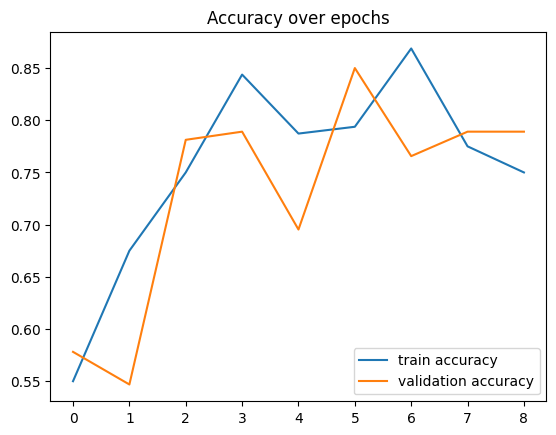

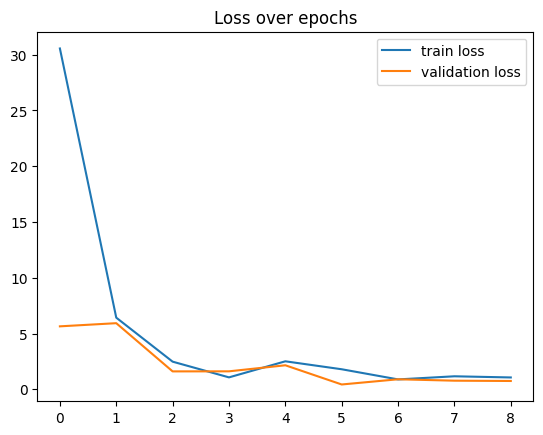

In [ ]:
plt.plot(history1.history['accuracy'], label='train accuracy')
plt.plot(history1.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [ ]:
model1.save('/content/drive/MyDrive/Colab Notebooks/Homework4/model1_H4_second.keras')
model2.save('/content/drive/MyDrive/Colab Notebooks/Homework4/model2_H4_second.keras')

import json
from tensorflow.keras.models import load_model

with open('/content/drive/MyDrive/Colab Notebooks/Homework4/second_history1.json', 'w') as f:
    json.dump(history1.history, f)

with open('/content/drive/MyDrive/Colab Notebooks/Homework4/second_history2.json', 'w') as f:
    json.dump(history2.history, f)

def load_model_and_history(model_path, history_path):
    model = load_model(model_path)
    with open(history_path, 'r') as f:
        history = json.load(f)
    return model, history

# # Load models and histories
# model1, history1_data = load_model_and_history(
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/model1_H4_second.keras',
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/second_history1.json'
# )
# model2, history2_data = load_model_and_history(
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/model2_H4_second.keras',
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/second_history2.json'
# )

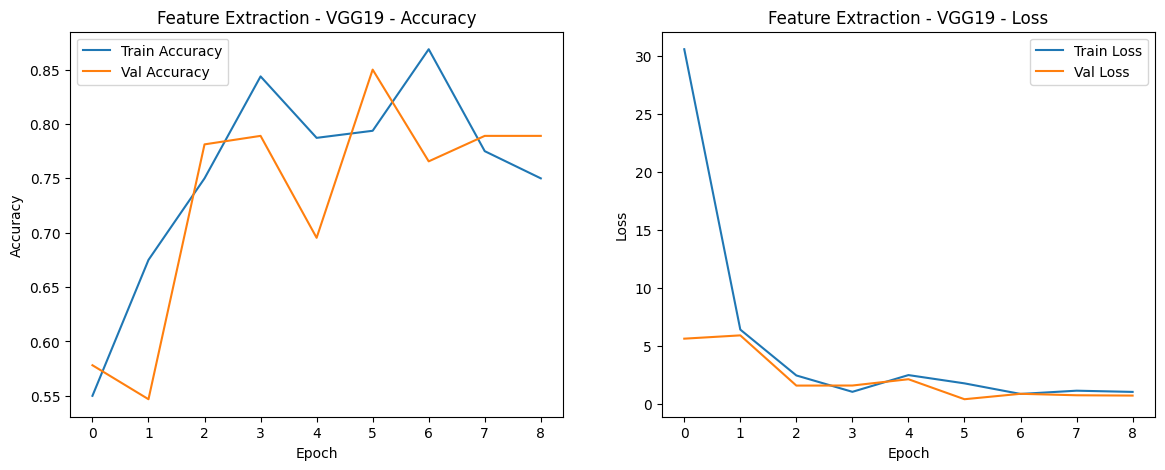

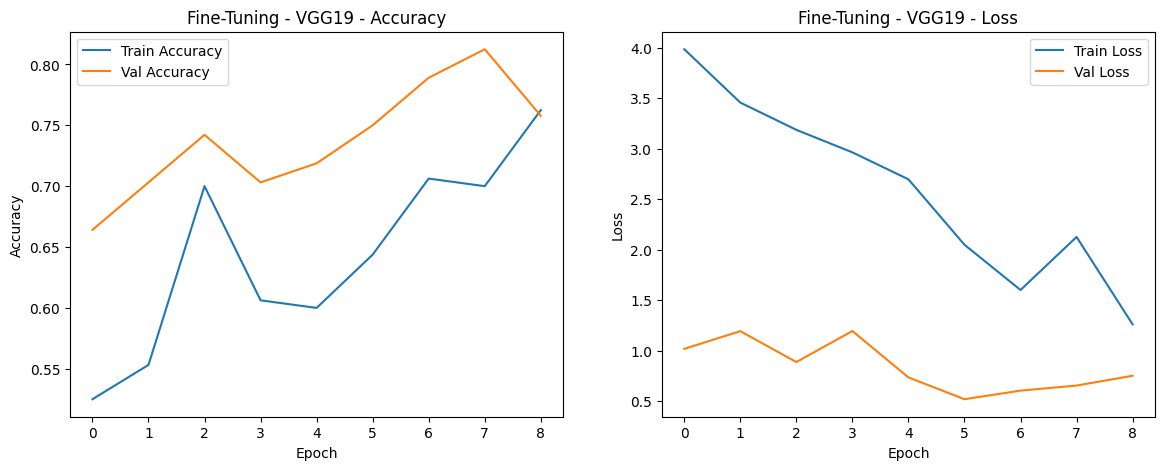

Hyperparameters Table
                Model  Layers  Batch Size Optimizer  Learning Rate  \
0  Feature Extraction      26          32      Adam          0.001   
1         Fine-Tuning      28          32      Adam          0.001   

   Dropout Rate  Final Dense Units Activation (Output)  
0           0.5                  1             sigmoid  
1           0.5                  1             sigmoid  
Final Train and Validation Metrics Comparison Table
                Model  Train Accuracy  Val Accuracy  Train Loss  Val Loss
0  Feature Extraction         0.86875        0.8500    0.889718  0.435439
1         Fine-Tuning         0.76250        0.8125    1.260527  0.518536


In [ ]:
import pandas as pd

def plot_metrics(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    plt.show()

plot_metrics(history1, "Feature Extraction - VGG19")

plot_metrics(history2, "Fine-Tuning - VGG19")

hyperparams = pd.DataFrame({
    "Model": ["Feature Extraction", "Fine-Tuning"],
    "Layers": [len(model1.layers), len(model2.layers)],
    "Batch Size": [BATCH_SIZE, BATCH_SIZE],
    "Optimizer": ["Adam", "Adam"],
    "Learning Rate": [0.001, 0.001],
    "Dropout Rate": [0.5, 0.5],
    "Final Dense Units": [1, 1],
    "Activation (Output)": ["sigmoid", "sigmoid"]
})
print("Hyperparameters Table")
print(hyperparams)

final_metrics = pd.DataFrame({
    "Model": ["Feature Extraction", "Fine-Tuning"],
    "Train Accuracy": [max(history1.history['accuracy']), max(history2.history['accuracy'])],
    "Val Accuracy": [max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])],
    "Train Loss": [min(history1.history['loss']), min(history2.history['loss'])],
    "Val Loss": [min(history1.history['val_loss']), min(history2.history['val_loss'])]
})
print("Final Train and Validation Metrics Comparison Table")
print(final_metrics)